# 1. Define the Problem
we want to predict the Revenue based on other features.

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

load the data

In [ ]:
data = pd.read_csv("/content/sales_data-1.csv");

In [ ]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [ ]:
# Handle missing values (assuming no missing values based on the provided data summary)
# Handle categorical features
from sklearn.preprocessing import LabelEncoder
# Encoding categorical features
label_encoders = {}
categorical_columns = ['Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Check for duplicates and remove them
data.drop_duplicates(inplace=True)

In [ ]:
# If Month is in string format like 'January', 'February', convert it to numerical
data['Month'] = pd.to_datetime(data['Month'], format='%B').dt.month

# data wrangle

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              112036 non-null  datetime64[ns]
 1   Day               112036 non-null  int64         
 2   Month             112036 non-null  int32         
 3   Year              112036 non-null  int64         
 4   Customer_Age      112036 non-null  int64         
 5   Age_Group         112036 non-null  int64         
 6   Customer_Gender   112036 non-null  int64         
 7   Country           112036 non-null  int64         
 8   State             112036 non-null  int64         
 9   Product_Category  112036 non-null  int64         
 10  Sub_Category      112036 non-null  int64         
 11  Product           112036 non-null  int64         
 12  Order_Quantity    112036 non-null  int64         
 13  Unit_Cost         112036 non-null  int64         
 14  Unit_Pric

In [ ]:
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,11,2013,19,3,1,1,5,0,0,12,8,45,120,590,360,950
1,2015-11-26,26,11,2015,19,3,1,1,5,0,0,12,8,45,120,590,360,950
2,2014-03-23,23,3,2014,49,0,1,0,26,0,0,12,23,45,120,1366,1035,2401
3,2016-03-23,23,3,2016,49,0,1,0,26,0,0,12,20,45,120,1188,900,2088
4,2014-05-15,15,5,2014,47,0,0,0,26,0,0,12,4,45,120,238,180,418


In [ ]:
data.describe()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,2014-11-23 05:22:32.008282880,15.665607,6.453390,2014.400925,35.919508,1.162992,0.516022,2.830269,21.852681,0.532454,9.331286,59.118248,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
min,2011-01-01 00:00:00,1.000000,1.000000,2011.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,8.000000,4.000000,2013.000000,28.000000,0.000000,0.000000,1.000000,6.000000,0.000000,6.000000,22.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,2014-06-27 00:00:00,16.000000,6.000000,2014.000000,35.000000,1.000000,1.000000,3.000000,15.000000,0.000000,10.000000,53.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,2016-01-09 00:00:00,23.000000,10.000000,2016.000000,43.000000,2.000000,1.000000,5.000000,36.000000,1.000000,14.000000,100.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,2016-07-31 00:00:00,31.000000,12.000000,2016.000000,87.000000,3.000000,1.000000,5.000000,52.000000,2.000000,16.000000,129.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000
std,NaN,8.781485,3.478344,1.273327,11.016543,1.199964,0.499745,1.995824,16.863481,0.742412,4.511562,41.258132,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623


In [ ]:
data.shape

(112036, 18)

# Cleaning up the data!


check for duplicate columns

In [ ]:
data.duplicated().sum()


0

we drop the duplicate rows

In [ ]:
data = data.drop_duplicates()


In [ ]:
data.duplicated().sum()

0

# Missing Values

In [ ]:
# Fix the indentation for the for loop
for col in data.columns:
    pct_missing = data[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

Date - 0.0%
Day - 0.0%
Month - 0.0%
Year - 0.0%
Customer_Age - 0.0%
Age_Group - 0.0%
Customer_Gender - 0.0%
Country - 0.0%
State - 0.0%
Product_Category - 0.0%
Sub_Category - 0.0%
Product - 0.0%
Order_Quantity - 0.0%
Unit_Cost - 0.0%
Unit_Price - 0.0%
Profit - 0.0%
Cost - 0.0%
Revenue - 0.0%


In [ ]:
for column in data.columns:
    print(column + ":")
    print(data[column].unique())

Date:
<DatetimeArray>
['2013-11-26 00:00:00', '2015-11-26 00:00:00', '2014-03-23 00:00:00',
 '2016-03-23 00:00:00', '2014-05-15 00:00:00', '2016-05-15 00:00:00',
 '2014-05-22 00:00:00', '2016-05-22 00:00:00', '2014-02-22 00:00:00',
 '2016-02-22 00:00:00',
 ...
 '2012-09-06 00:00:00', '2011-09-06 00:00:00', '2012-01-07 00:00:00',
 '2011-01-07 00:00:00', '2012-10-27 00:00:00', '2011-10-27 00:00:00',
 '2013-01-06 00:00:00', '2015-01-06 00:00:00', '2012-02-20 00:00:00',
 '2011-02-20 00:00:00']
Length: 1884, dtype: datetime64[ns]
Day:
[26 23 15 22 30  2 17 27 25 13 19 11 31 28  7 24  3  4 10 12  6 20 29 16
 14 18  9  8  5  1 21]
Month:
[11  3  5  2  7  8  9  1 12  6 10  4]
Year:
[2013 2015 2014 2016 2012 2011]
Customer_Age:
[19 49 47 35 32 34 29 51 48 43 61 57 38 52 24 23 26 54 46 41 33 42 45 53
 21 22 67 31 37 87 25 40 44 55 50 59 17 27 28 36 56 58 30 18 62 39 64 63
 20 60 84 68 65 73 69 66 75 76 78 71 72 82 86 77 74 85 81 80 70 79]
Age_Group:
[3 0 2 1]
Customer_Gender:
[1 0]
Country:
[1 0

In [ ]:
numeric_data = data.select_dtypes(include=["number"])
corr_matrix = numeric_data.corr()

# Exploratory data analysis

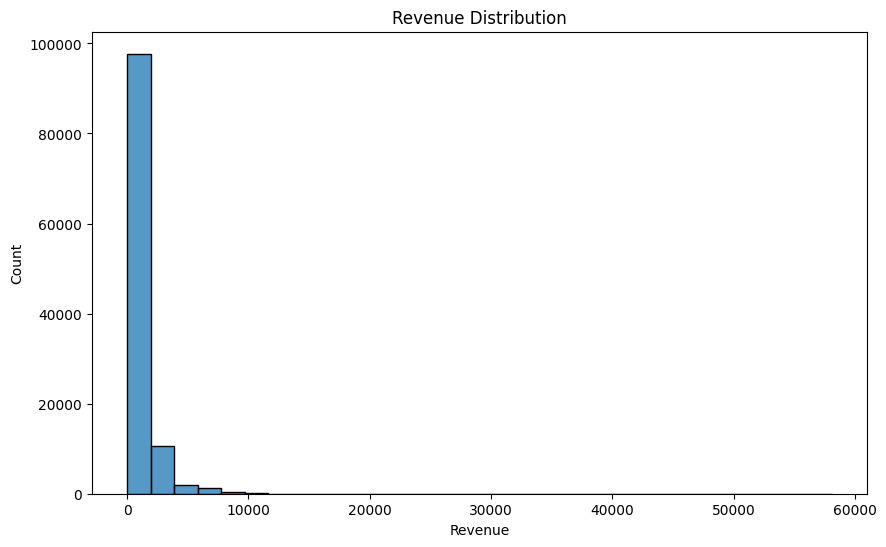

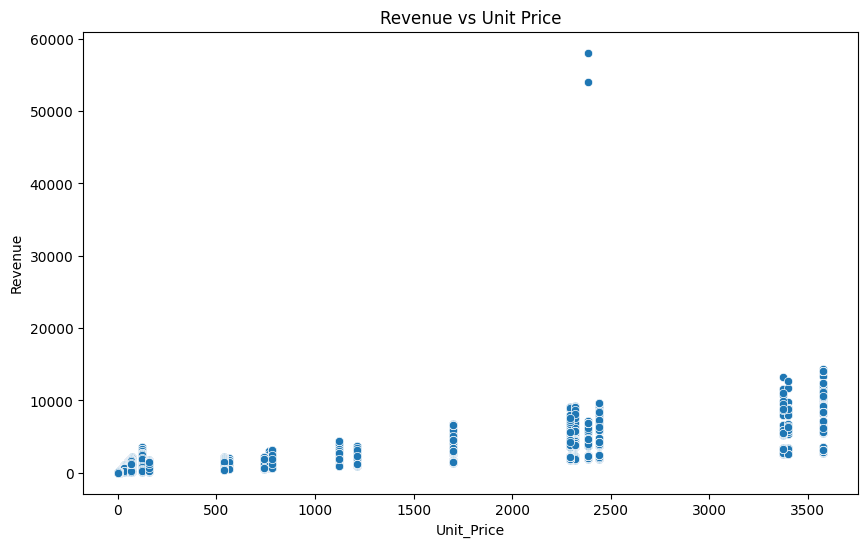

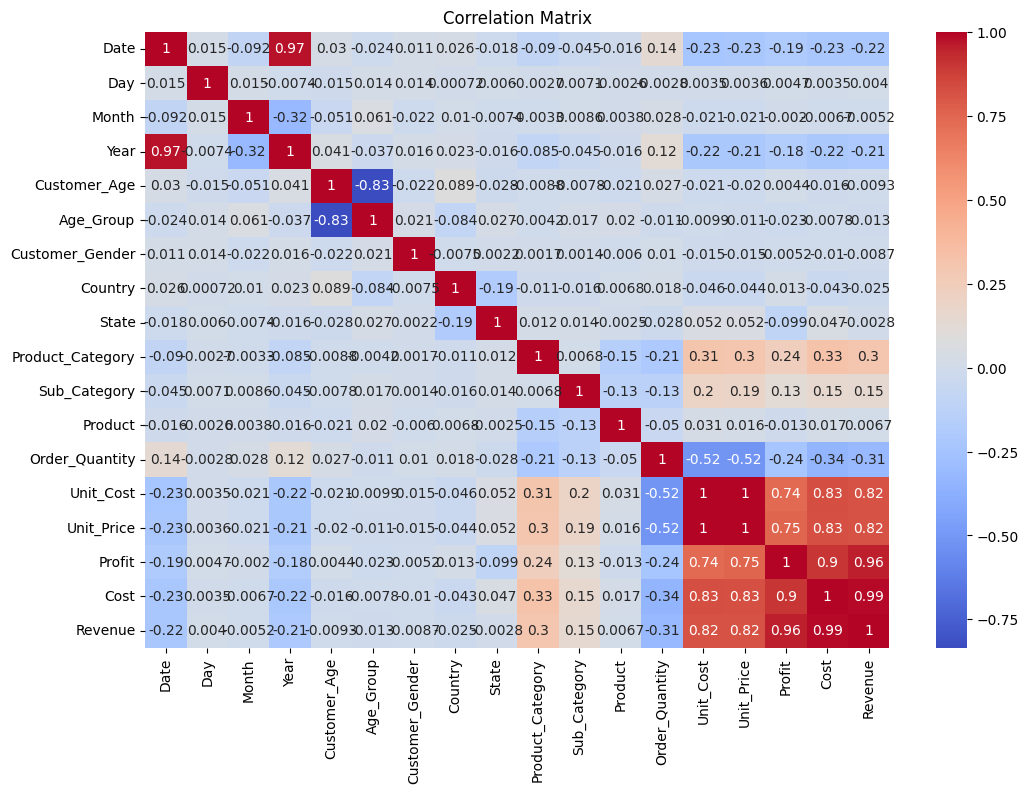

In [ ]:
# Univariate analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['Revenue'], bins=30)
plt.title('Revenue Distribution')
plt.show()

# Bivariate analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unit_Price', y='Revenue', data=data)
plt.title('Revenue vs Unit Price')
plt.show()

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Extract features from date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day


#  Hypothesis Testing

In [ ]:
from scipy.stats import ttest_ind

# Hypothesis: Do higher order quantities lead to higher revenue?
high_quantity = data[data['Order_Quantity'] > data['Order_Quantity'].median()]['Revenue']
low_quantity = data[data['Order_Quantity'] <= data['Order_Quantity'].median()]['Revenue']
t_stat, p_value = ttest_ind(high_quantity, low_quantity)

print(f'T-test Statistic: {t_stat}, P-value: {p_value}')

T-test Statistic: -106.17070774527402, P-value: 0.0


# Model Building

In [ ]:
# Extract features from date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

Model Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Prepare data
X = data[['Day', 'Month', 'Year', 'Customer_Age', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost']]
y = data['Revenue']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }

# Display results
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")


Model: Linear Regression
MAE: 9.596759897526583e-13
MSE: 1.651602015738052e-24
RMSE: 1.2851466903579732e-12
R²: 1.0


Model: Decision Tree Regressor
MAE: 0.4896465548018565
MSE: 753.7558907533024
RMSE: 27.454615108453122
R²: 0.9995635157999662


Model: Random Forest Regressor
MAE: 0.8442404498393425
MSE: 5428.168683077471
RMSE: 73.67610659554066
R²: 0.9968566615606627


Model: Gradient Boosting Regressor
MAE: 14.104189041860085
MSE: 856.9354333079148
RMSE: 29.27345953774365
R²: 0.9995037666946599




# 7. Model Evaluation and Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
print(f'Optimized RMSE: {mean_squared_error(y_test, y_pred_optimized, squared=False)}')
print(f'Optimized R²: {r2_score(y_test, y_pred_optimized)}')


Optimized RMSE: 27.27227216784434
Optimized R²: 0.9995692944648548


# 8. Insights and Recommendations

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Check if the target variable is binary or multiclass
# Modify this based on your specific data
is_binary = len(data['Revenue'].unique()) == 2

# Choose the appropriate model based on the target variable type
if is_binary:
    model = GradientBoostingClassifier(n_estimators=100, random_state=42)
else:
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the appropriate metrics
if is_binary:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
else:
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the appropriate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 14.104189041860085
MSE: 856.9354333079148
RMSE: 29.27345953774365
R²: 0.9995037666946599


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Choose the appropriate model based on the target variable type
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the appropriate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 14.104189041860085
MSE: 856.9354333079148
RMSE: 29.27345953774365
R²: 0.9995037666946599


In [ ]:
# Example insight
importance = best_model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print(feature_importance)

# Example recommendation: If certain products or customer segments show higher revenue, focus marketing efforts on those areas.


Cost                9.692698e-01
Profit              1.222272e-02
State               7.158610e-03
Order_Quantity      6.189759e-03
Product_Category    2.913681e-03
Sub_Category        1.532540e-03
Unit_Price          3.444213e-04
Unit_Cost           2.820694e-04
Product             6.988087e-05
Country             8.838203e-06
Customer_Age        3.323075e-06
Day                 3.067673e-06
Month               8.603294e-07
Year                2.486085e-07
Age_Group           1.483646e-07
Customer_Gender     4.353811e-08
dtype: float64


# 9. Visualization and Reporting

In [ ]:
!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

# Create a simple dashboard with Dash
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='eCommerce Revenue Dashboard'),

    dcc.Graph(
        id='revenue-distribution',
        figure=px.histogram(data, x='Revenue', nbins=30, title='Revenue Distribution')
    ),

    dcc.Graph(
        id='revenue-vs-price',
        figure=px.scatter(data, x='Unit_Price', y='Revenue', title='Revenue vs Unit Price')
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 49.9 MB/s eta 0:00:00


<ipython-input-39-4f616200b603>:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-39-4f616200b603>:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>

# 10. Deployment and Monitoring

In [ ]:
import joblib

# Save the best model (let's assume Gradient Boosting Regressor performed the best)
best_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
joblib.dump(best_model, 'revenue_model.pkl')


['revenue_model.pkl']

In [ ]:
# Flask app for deployment
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)
model = joblib.load('revenue_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    features = [
        data['Day'], data['Month'], data['Year'], data['Customer_Age'], data['Age_Group'],
        data['Customer_Gender'], data['Country'], data['State'], data['Product_Category'],
        data['Sub_Category'], data['Product'], data['Order_Quantity'], data['Unit_Cost'],
        data['Unit_Price'], data['Profit'], data['Cost']
    ]
    prediction = model.predict([features])
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on
